# Introduction
In this project we will employ the use the Multiple Linear Regression method together with a machine learning algorith( Random Forests) in building a prediction model. This prediction model will be used to predict health charges in a particular region.

## Problem Stages:
* **Hypothesis Generation** : Generate the business problem, and what kind of data and method we will need to solve this.

* **Exploratory Data Analysis** : We understand the variables involved, and try to come up with factors which might impact the health charges of the individual, and how much these variables affect each other. Here we will divide variables into categorical and numerical variables. We visualize relationships among variables, and note down any unusual obervations.

* **Data Cleaning**: Check data for missing values and possible outliers. Investigate and find a solution to missing values by statistical methods.

* **Feature Engineering**: Transforming raw data into features that better represent the underlying problem to the predictive models. Involves modifiying existing variables and creating new ones for our prediction model.

* **Model Building** : We build a predictive model using mathematics together with machine learning.


## 1.Hypothesis:
Building a model to predict charges for a health facility so as to tailor a good budget for the coming year.

## 2. Exploratory Data Analysis:

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import os
import warnings
warnings.filterwarnings('ignore')


In [5]:
data=pd.read_csv('/Users/othnielashidam/Downloads/Insurance.csv')

In [102]:
data.head() #Overview of the table, observing all columns and names.

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## Data Cleaning:
Data is checked for missing values. No missing values in this dataset as recorded. 

In [105]:
data.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northeast    0
northwest    0
southeast    0
southwest    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [8]:
data.describe() #Summary of table statistics

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.columns

Index([u'age', u'sex', u'bmi', u'children', u'smoker', u'region', u'charges'], dtype='object')

Checking for missing values:

In [10]:
data.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

EDA 1: Visualizing data in a pairplot.

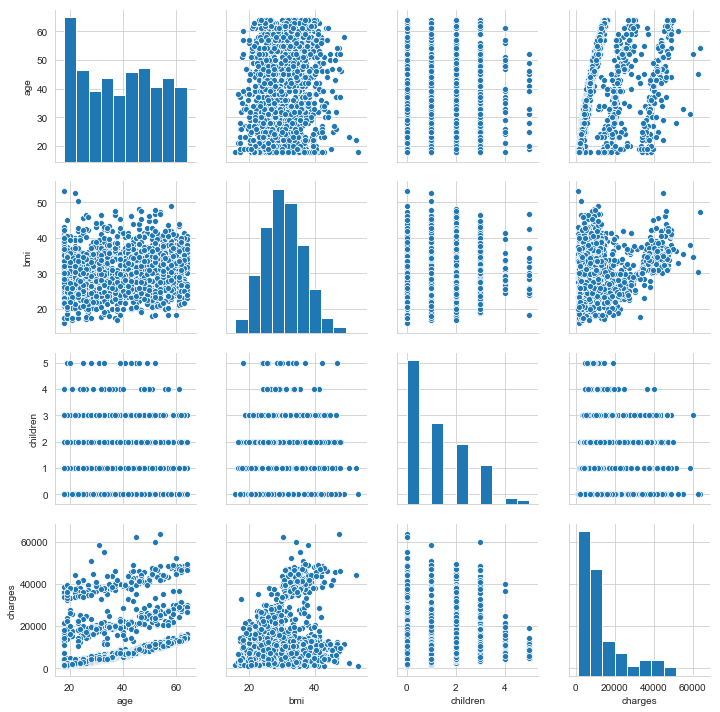

In [13]:
sns.pairplot(data)

Since **'charges'** is our dependent variable, we visualize the distribution of this variable. This is a distribution skewed to the right. Most of the outliers are found to the right of the mean.

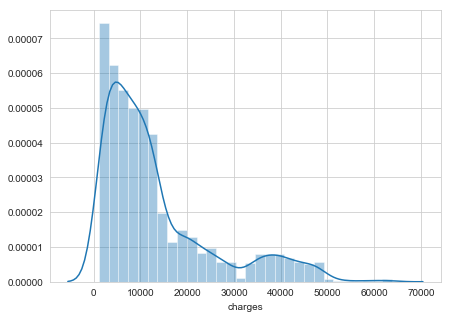

In [14]:
plt.figure(figsize=(7,5))

sns.distplot(data['charges'])

We also visualize the distribution of the  variable **'age'**. 

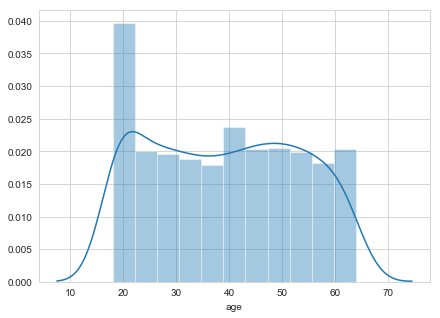

In [15]:
plt.figure(figsize=(7,5))
sns.distplot(data['age'])

Descriptive statistics about the **'age'** variable. Minimum and maximum ages are 18 and 64 respectively with mean age, 39 years.

In [16]:
data['age'].mean()

39.20702541106129

In [17]:
data['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [103]:
data['age'].count()

1338

Correlation matrix:

In [19]:
datacorr=data.corr()

In [20]:
datacorr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Heatmap to observe the correlations:

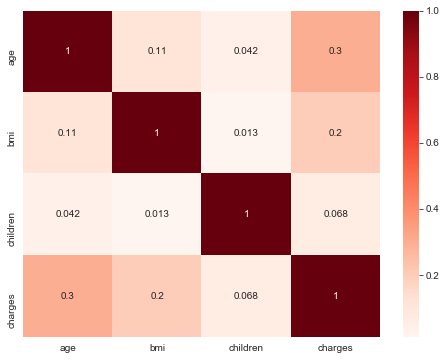

In [21]:
plt.figure(figsize=(8,6))

sns.heatmap(datacorr,cmap="Reds",annot=True)

Another visualization between two variables: 'age' and 'charges':

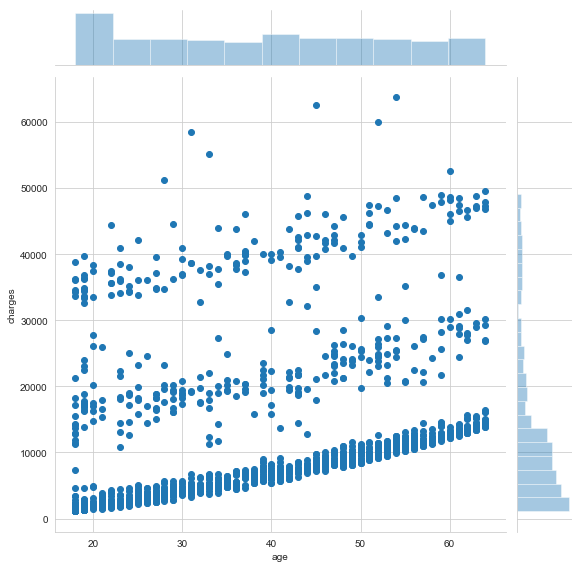

In [22]:
sns.jointplot(x='age',y='charges',data=data,height=8, ratio=7, space=0.2)

The variable **'region'** is aggregated using charges. Various charges among all regions look normal. No trends could be observed.

In [23]:
data.groupby('region').mean()['charges']

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

A bar chart of regions and charges:

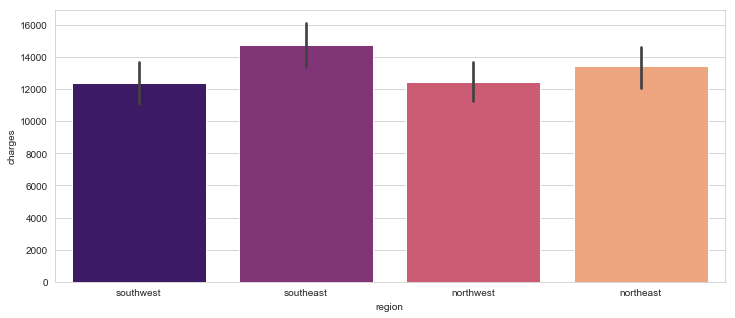

In [24]:
plt.figure(figsize=(12,5))
sns.barplot(x='region',y='charges',data=data,palette='magma')

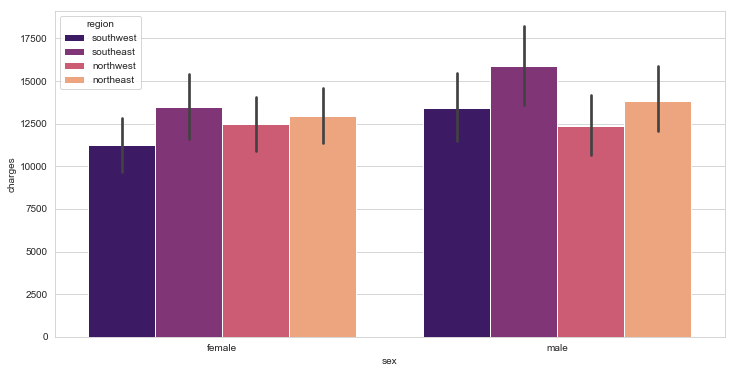

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x='sex',y='charges',hue='region',data=data,palette='magma')

In [27]:
data.columns

Index([u'age', u'sex', u'bmi', u'children', u'smoker', u'region', u'charges'], dtype='object')

Both male and female smokers are observed, to know the impact of smoking on charges for smoking and non-smoking individuals. We notice a really high impact smoking has on health charges.

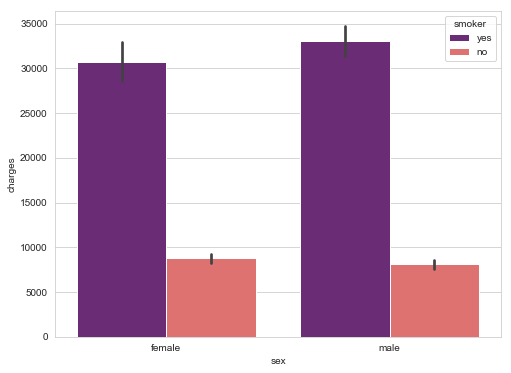

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(x='sex',y='charges',hue='smoker',data=data,palette='magma')

<Figure size 576x432 with 0 Axes>

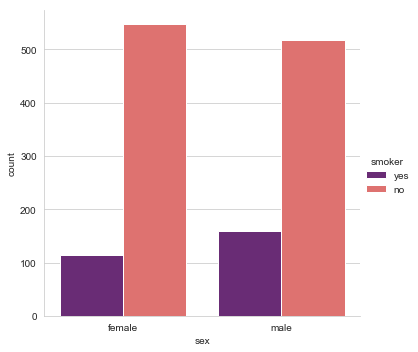

In [29]:
plt.figure(figsize=(8,6))
sns.catplot(x='sex',kind='count',hue='smoker',data=data,palette='magma')

<Figure size 864x720 with 0 Axes>

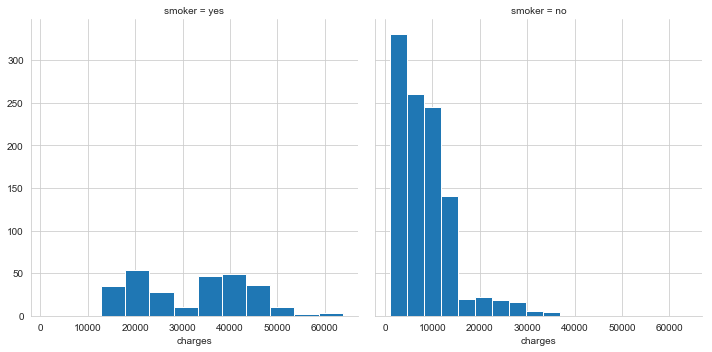

In [30]:
plt.figure(figsize=(12,10))
g=sns.FacetGrid(data=data,col='smoker',height=5, aspect=1)
g.map(plt.hist,'charges')

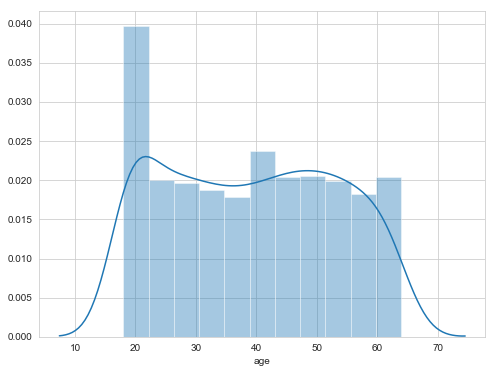

In [31]:
plt.figure(figsize=(8,6))
sns.distplot(data['age'])

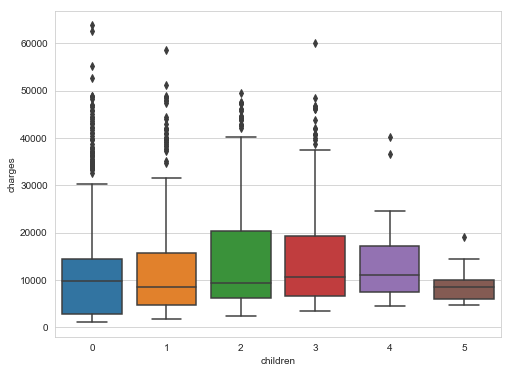

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x='children',y='charges',data=data)

In [33]:
data.columns

Index([u'age', u'sex', u'bmi', u'children', u'smoker', u'region', u'charges'], dtype='object')

## Feature Engineering:

We label encode categoraical variables with two categories and use one-hot encoding for variables with more than two categories.


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder() #instantiate (creating an object)
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

In [38]:
le.fit(data.smoker.drop_duplicates())
data.smoker=le.transform(data.smoker)


In [39]:
#one hot encoding for region

In [40]:
coded_region=pd.get_dummies(data.region)

A dummy table of the categorical value **'region'** is created using the **pd.get_dummies** method. This new table called **coded_region** will be merged with our exisiting table, and the original column **'region'** deleted, since it will be redundant. 

In [41]:
coded_region.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [42]:
merged_data=pd.concat([data,coded_region],axis=1)


In [43]:
merged_data.head(20)

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0
5,31,0,25.740,0,0,southeast,3756.62160,0,0,1,0
6,46,0,33.440,1,0,southeast,8240.58960,0,0,1,0
7,37,0,27.740,3,0,northwest,7281.50560,0,1,0,0
8,37,1,29.830,2,0,northeast,6406.41070,1,0,0,0
9,60,0,25.840,0,0,northwest,28923.13692,0,1,0,0


To avoid multicollinearity, one of the newly created columns from **'coded_region'** is dropped. In this case we will drop the column **'southwest'**.


In [46]:
data=merged_data

In [47]:
data.drop('region',axis=1,inplace=True)

In [48]:
a=data.drop('southwest',axis=1)

In [49]:
a.head(3)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast
0,19,0,27.90,0,1,16884.9240,0,0,0
1,18,1,33.77,1,0,1725.5523,0,0,1
2,28,1,33.00,3,0,4449.4620,0,0,1


## Model Building:


In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr=LinearRegression()

The dependent column **'charges'** is dropped from the main data set, to form another dataset **y**. 


In [53]:
data.columns

Index([u'age', u'sex', u'bmi', u'children', u'smoker', u'charges',
       u'northeast', u'northwest', u'southeast', u'southwest'],
      dtype='object')

In [54]:
x=data[['age','sex', 'bmi', 'children', 'smoker',
       'northeast', 'northwest', 'southeast']]

In [55]:
x.head(10)

,age,sex,bmi,children,smoker,northeast,northwest,southeast
0,19,0,27.900,0,1,0,0,0
1,18,1,33.770,1,0,0,0,1
2,28,1,33.000,3,0,0,0,1
3,33,1,22.705,0,0,0,1,0
4,32,1,28.880,0,0,0,1,0
5,31,0,25.740,0,0,0,0,1
6,46,0,33.440,1,0,0,0,1
7,37,0,27.740,3,0,0,1,0
8,37,1,29.830,2,0,1,0,0
9,60,0,25.840,0,0,0,1,0


In [56]:
y=data['charges']

In [57]:
y.head(10)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [58]:
data.columns

Index([u'age', u'sex', u'bmi', u'children', u'smoker', u'charges',
       u'northeast', u'northwest', u'southeast', u'southwest'],
      dtype='object')

Here we separate our data into training and testing sets. 70% of the data is used for training the model, and the remaining 30% for testing.

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=59)

In [60]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
predictions = lr.predict(x_test)

In [62]:
print(lr.score(x_test,y_test))

0.7898146427713023


In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))  

('Mean Absolute Error:', 4222.156067504518)
('Mean Squared Error:', 35410323.890392035)
('Root Mean Squared Error:', 5950.65743345994)


In [64]:
#create new data for feature engineering 1

In [65]:
ft=data[['age','sex', 'bmi', 'children', 'smoker',
       'northeast', 'northwest', 'southeast']]

In [66]:
ft.head(10)

,age,sex,bmi,children,smoker,northeast,northwest,southeast
0,19,0,27.900,0,1,0,0,0
1,18,1,33.770,1,0,0,0,1
2,28,1,33.000,3,0,0,0,1
3,33,1,22.705,0,0,0,1,0
4,32,1,28.880,0,0,0,1,0
5,31,0,25.740,0,0,0,0,1
6,46,0,33.440,1,0,0,0,1
7,37,0,27.740,3,0,0,1,0
8,37,1,29.830,2,0,1,0,0
9,60,0,25.840,0,0,0,1,0


In [67]:
def agecat(x):
    if (x <15):
        return 'child'
    elif (x >=15 and x< 25):
        return 'youth'
    elif (x>=25 and x<60):
        return 'adult'
    else :
        return 'senior'

In [68]:
ft['age_group']=ft['age'].apply(lambda x: agecat(x))

In [69]:
ft['age_group_m']=ft.age_group.map({'child':'0','youth':'1','adult':'2','senior':'3'})
    

In [70]:
ft.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,age_group,age_group_m
0,19,0,27.900,0,1,0,0,0,youth,1
1,18,1,33.770,1,0,0,0,1,youth,1
2,28,1,33.000,3,0,0,0,1,adult,2
3,33,1,22.705,0,0,0,1,0,adult,2
4,32,1,28.880,0,0,0,1,0,adult,2


In [71]:
ft.drop('age_group',axis=1,inplace=True)

In [72]:
ft.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,age_group_m
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,1
2,28,1,33.000,3,0,0,0,1,2
3,33,1,22.705,0,0,0,1,0,2
4,32,1,28.880,0,0,0,1,0,2


In [73]:
#modify bmi categorical variable

In [74]:
#BMI would be converted into a categorical variable and label encoded.

In [75]:
def bmicat(x):
    if (x <18.5):
        return 'underweight'
    elif (x >=18.5 and x< 25):
        return 'normal'
    elif (x>=25 and x<29.9):
        return 'overweight'
    else :
        return 'obese'

In [76]:
ft['new_bmi']=ft['bmi'].apply(lambda x: bmicat(x))

In [77]:
ft.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,age_group_m,new_bmi
0,19,0,27.900,0,1,0,0,0,1,overweight
1,18,1,33.770,1,0,0,0,1,1,obese
2,28,1,33.000,3,0,0,0,1,2,obese
3,33,1,22.705,0,0,0,1,0,2,normal
4,32,1,28.880,0,0,0,1,0,2,overweight


In [78]:
ft.columns

Index([u'age', u'sex', u'bmi', u'children', u'smoker', u'northeast',
       u'northwest', u'southeast', u'age_group_m', u'new_bmi'],
      dtype='object')

In [79]:
fte= ft[['age','sex','bmi','children','smoker','northeast',
    'northwest','southeast','age_group_m', 'new_bmi']]

In [80]:
fte['bmi_gp']=fte.new_bmi.map({'underweight': '0','normal':'1','overweight':'2','obese':'3'})

In [81]:
fte.head(3)

,age,sex,bmi,children,smoker,northeast,northwest,southeast,age_group_m,new_bmi,bmi_gp
0,19,0,27.90,0,1,0,0,0,1,overweight,2
1,18,1,33.77,1,0,0,0,1,1,obese,3
2,28,1,33.00,3,0,0,0,1,2,obese,3


In [82]:
#now we drop the new_bmi column

In [83]:
fte.drop('new_bmi',axis=1,inplace=True)

In [84]:
fte.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,age_group_m,bmi_gp
0,19,0,27.900,0,1,0,0,0,1,2
1,18,1,33.770,1,0,0,0,1,1,3
2,28,1,33.000,3,0,0,0,1,2,3
3,33,1,22.705,0,0,0,1,0,2,1
4,32,1,28.880,0,0,0,1,0,2,2


In [85]:
fte.columns

Index([u'age', u'sex', u'bmi', u'children', u'smoker', u'northeast',
       u'northwest', u'southeast', u'age_group_m', u'bmi_gp'],
      dtype='object')

In [86]:
X1=fte[['age', 'sex', 'bmi', 'children', 'smoker', 'northeast',
       'northwest', 'southeast', 'age_group_m', 'bmi_gp']]


In [87]:
y1=data['charges']

In [88]:
x_tr,x_te,y_tr,y_te = train_test_split(X1,y1,test_size=0.2,random_state = 59)

In [89]:
lr.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
predictions1 = lr.predict(x_te)

In [91]:
print(lr.score(x_te,y_te))

0.794849906742415


In [92]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [93]:
regressor = RandomForestRegressor(n_estimators=100, random_state=59)  
rf=regressor.fit(x_tr, y_tr)  
y_pred = regressor.predict(x_te)  


In [94]:
print(rf.score(x_te,y_te))

0.8516784430599924


In [95]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_te, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_te, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))  

('Mean Absolute Error:', 2687.809058183012)
('Mean Squared Error:', 24953004.159361534)
('Root Mean Squared Error:', 4995.298205248765)


In [96]:
errors=(y_te-predictions1)

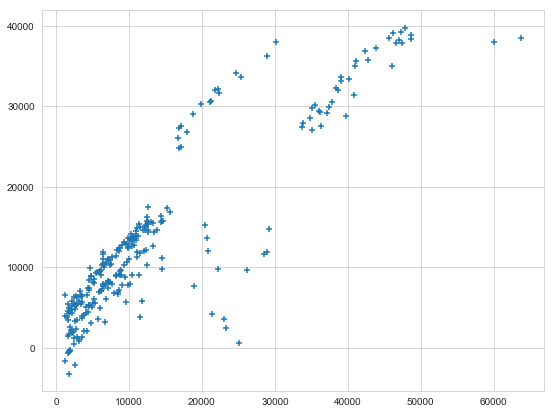

In [97]:
plt.figure(figsize=(9,7))
plt.scatter(y_te,predictions1,marker='+')

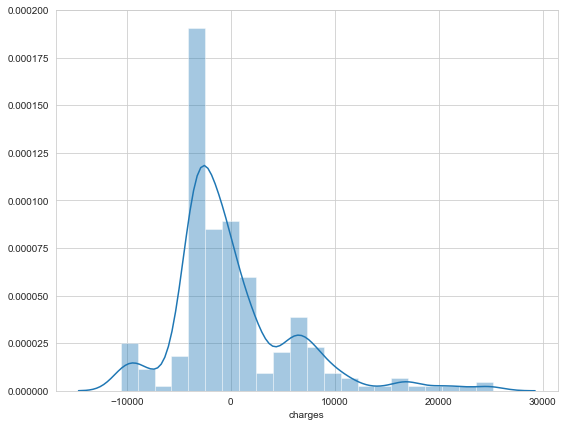

In [98]:
plt.figure(figsize=(9,7))
sns.distplot(errors)

In [100]:
#the distribution is skewed to the right. One of the reasons that ; most of the outliers are on the right.
